In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.regression import *
from pycaret.clustering import ClusteringExperiment

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,  silhouette_samples
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from IPython.display import Image, display, Markdown
from IPython.core.display import HTML
import warnings

warnings.filterwarnings("ignore")

display(HTML("<style = font-size>pre {white-space: pre !important;}</style>"))

In [2]:
def KMeans_cluster(data, k):
    # 2. initialize the model
    my_kmeans = KMeans(n_clusters= k)

    # 3. fit the model to the data
    my_kmeans.fit(data) # pass your scaled data here
 
    # 4. obtain the cluster output
    clusters = my_kmeans.predict(data) # pass your scaled data here
    centroids = my_kmeans.cluster_centers_
    
    return clusters,  pd.DataFrame(centroids)
    # 5. attach the cluster output to our original DataFrame
#your_original_dataframe["cluster"] = clusters 

In [3]:
def clusters_num(data):
    inertia_list = []
    k = []
    sil_score = []
    for i in range(2,30):
        k.append(i)
        myKMeans = KMeans(n_clusters=i)
        myKMeans.fit(data)
        inertia_list.append(round(myKMeans.inertia_, 2))
        sil_score.append(round( silhouette_score(data, myKMeans.labels_), 2)) 
    return inertia_list ,  sil_score, k

In [4]:
data_dir = "./data/"

In [5]:
df_insurance = pd.read_csv(f"{data_dir}insurance.csv")
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Data Cleaning
df_insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Feature Engeneering
'''
df_insurance["born_year"] = (
    pd.Timestamp.now() - (df_insurance["age"] * np.timedelta64(365, "D"))
).dt.year
df_insurance["has_children"] = df_insurance["children"] > 0
'''
df_insurance = pd.get_dummies(df_insurance, drop_first=True)

df_insurance

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [8]:
# Data Analysis
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
# Data Transformation

'''
scaler = MinMaxScaler()
df_insurance['age'] = pd.DataFrame(scaler.fit_transform(df_insurance[['age']]))
df_insurance['bmi'] = pd.DataFrame(scaler.fit_transform(df_insurance[['bmi']]))
df_insurance['children'] = pd.DataFrame(scaler.fit_transform(df_insurance[['children']]))
df_insurance['charges'] = pd.DataFrame(scaler.fit_transform(df_insurance[['charges']]))
# df_insurance['born_year'] = pd.DataFrame(scaler.fit_transform(df_insurance[['born_year']]))
'''

df_insurance

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [10]:
inertia_list, sil_score ,k = clusters_num(df_insurance)

In [11]:
inertia_list = []
sil_score = []

for i in range(10):
    a, b , k = clusters_num(df_insurance)
    inertia_list.append(a)
    sil_score.append(b)

In [12]:
inertia_list_mean = np.mean(inertia_list,0)
sil_score_mean = np.mean(sil_score,0)

Text(0.5, 0, 'k')

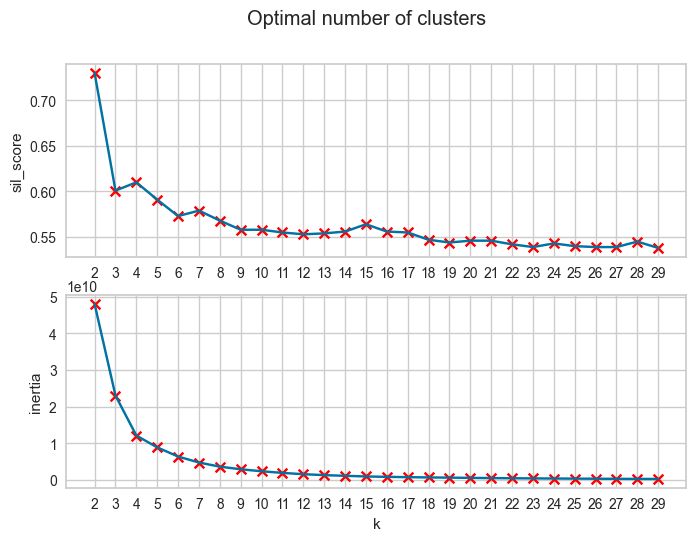

In [13]:
fig, axs = plt.subplots(2)
fig.suptitle('Optimal number of clusters')
axs[0].plot(k , sil_score_mean)
axs[0].scatter(k , sil_score_mean, marker='x', color = 'red')
axs[0].set_ylabel('sil_score')

axs[0].set_xticks(k)
axs[1].plot(k , inertia_list_mean)
axs[1].scatter(k , inertia_list_mean, marker='x', color = 'red')
axs[1].set_ylabel('inertia')
axs[1].set_xticks(k)
axs[1].set_xlabel('k')
#fig.savefig('Optimal number of clusters')

In [14]:
clusters, centroids = KMeans_cluster(df_insurance, 5)

In [15]:
df_insurance["cluster"] = clusters
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
 9   cluster           1338 non-null   int32  
dtypes: bool(5), float64(2), int32(1), int64(2)
memory usage: 53.7 KB


In [16]:
df_insurance

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,cluster
0,19,27.900,0,16884.92400,False,True,False,False,True,1
1,18,33.770,1,1725.55230,True,False,False,True,False,0
2,28,33.000,3,4449.46200,True,False,False,True,False,0
3,33,22.705,0,21984.47061,True,False,True,False,False,1
4,32,28.880,0,3866.85520,True,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False,3
1334,18,31.920,0,2205.98080,False,False,False,False,False,0
1335,18,36.850,0,1629.83350,False,False,False,True,False,0
1336,21,25.800,0,2007.94500,False,False,False,False,True,0


In [17]:
df_insurance['cluster'] = df_insurance['cluster'].astype('category')
df_insurance = pd.get_dummies(df_insurance, drop_first=True)
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   charges           1338 non-null   float64
 4   sex_male          1338 non-null   bool   
 5   smoker_yes        1338 non-null   bool   
 6   region_northwest  1338 non-null   bool   
 7   region_southeast  1338 non-null   bool   
 8   region_southwest  1338 non-null   bool   
 9   cluster_1         1338 non-null   bool   
 10  cluster_2         1338 non-null   bool   
 11  cluster_3         1338 non-null   bool   
 12  cluster_4         1338 non-null   bool   
dtypes: bool(9), float64(2), int64(2)
memory usage: 53.7 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

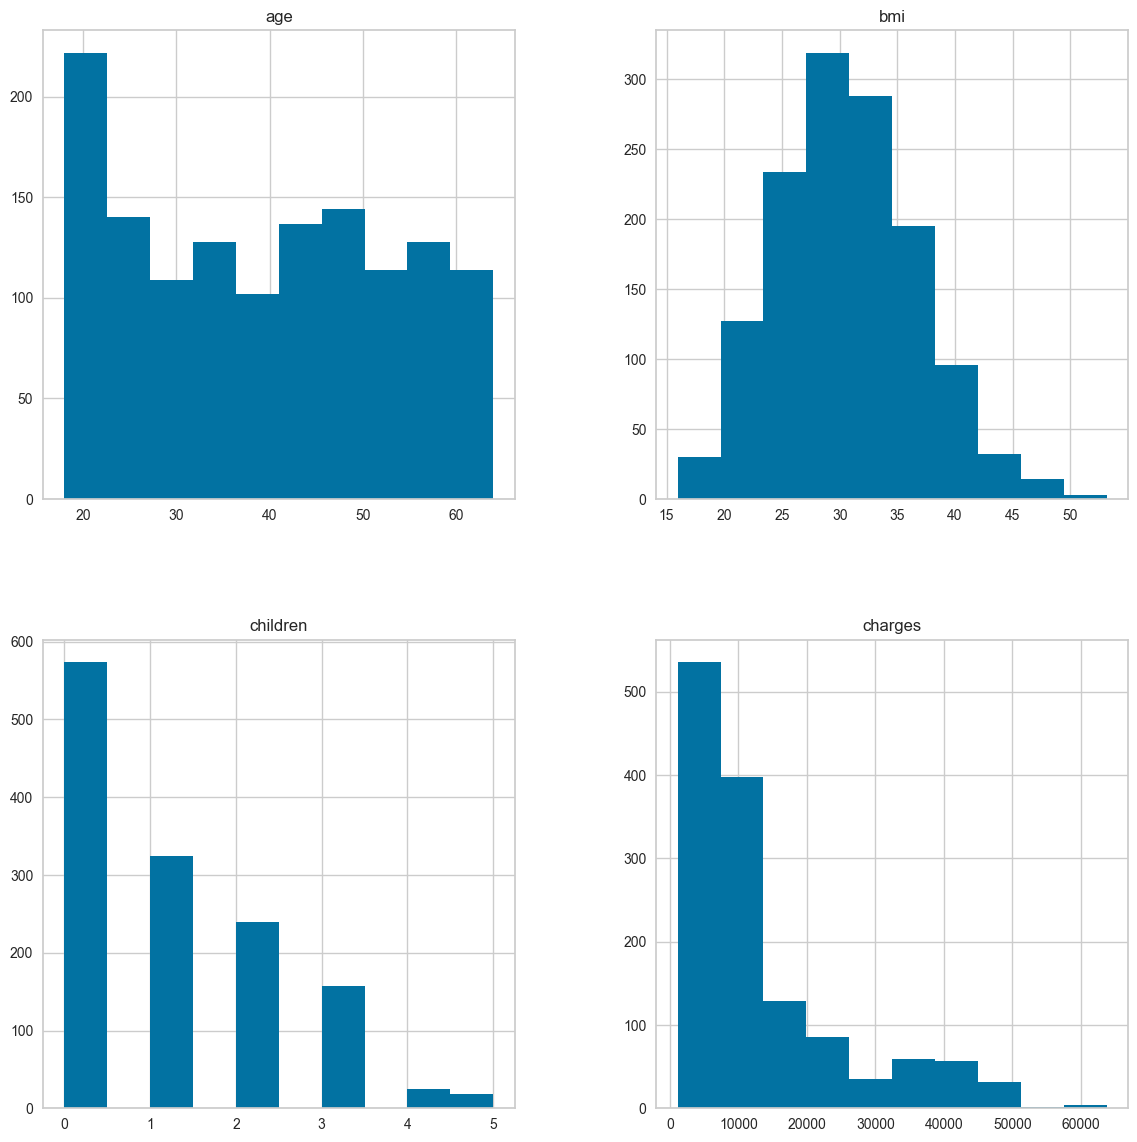

In [18]:
df_insurance.hist(figsize=(14, 14))

<Axes: >

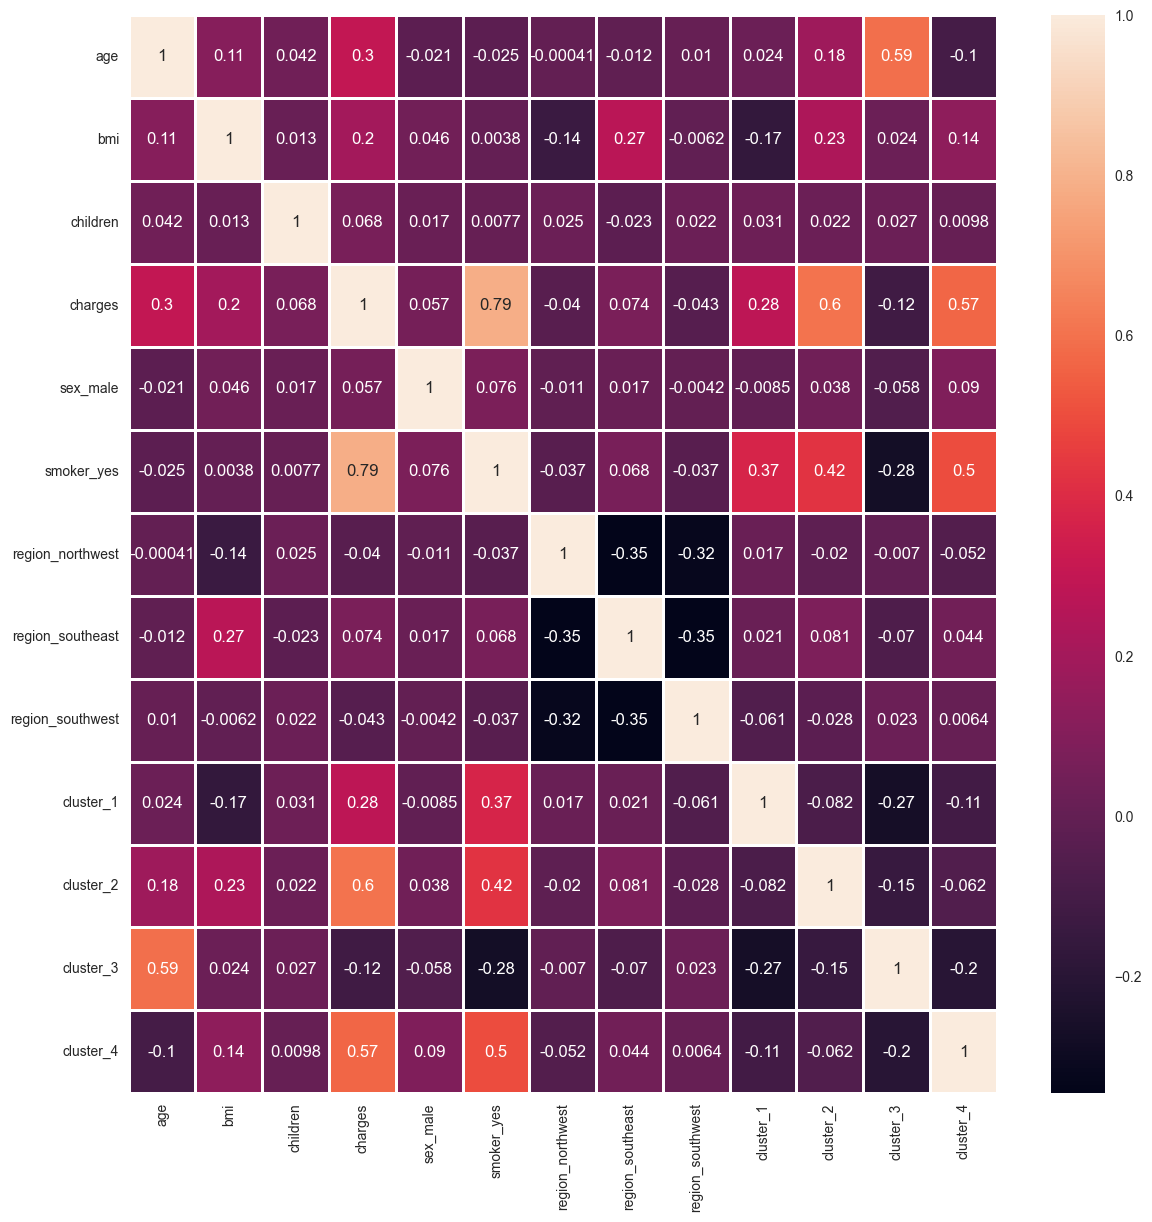

In [19]:
# Data Analysis
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_insurance.corr(), annot=True, linewidths=0.8)

In [20]:
train_data, validation_data = train_test_split(df_insurance, train_size=0.8, random_state=123, shuffle=True)

In [21]:
train_data.shape

(1070, 13)

In [22]:
validation_data.shape

(268, 13)

In [23]:
experiment = RegressionExperiment()
experiment.setup(data=train_data,
                 train_size=0.9,                 
                 target='charges',
                 session_id=123,
                 use_gpu=False)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1070, 13)"
4,Transformed data shape,"(1070, 13)"
5,Transformed train set shape,"(963, 13)"
6,Transformed test set shape,"(107, 13)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [24]:
best_model = experiment.compare_models(exclude=['lightgbm', 'gbr'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,709.6503,3048345.2830,1696.5538,0.9786,0.0742,0.0427,0.0170
rf,Random Forest Regressor,773.9365,3480143.5123,1794.2036,0.9747,0.0853,0.0531,0.0210
lr,Linear Regression,1536.2429,5189063.8500,2250.1453,0.9627,0.2196,0.1762,0.1090
lasso,Lasso Regression,1533.6146,5189962.2250,2250.1098,0.9627,0.2198,0.1762,0.0640
llar,Lasso Least Angle Regression,1533.7753,5189957.6750,2250.1184,0.9627,0.2198,0.1762,0.0030
br,Bayesian Ridge,1534.2269,5189369.7500,2250.0248,0.9627,0.2195,0.1760,0.0030
ridge,Ridge Regression,1496.5462,5441693.2000,2296.4457,0.9609,0.2207,0.1723,0.0020
lar,Least Angle Regression,1727.1459,5466524.7500,2321.1119,0.9603,0.2420,0.2001,0.0020
dt,Decision Tree Regressor,1003.2060,6939128.5135,2485.4405,0.9462,0.1121,0.0688,0.0040
ada,AdaBoost Regressor,3002.9209,12772101.0319,3563.3860,0.9063,0.5893,0.6463,0.0060


In [25]:
experiment.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
predict_holdout = experiment.predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,646.8404,2345580.0031,1531.5286,0.9870,0.0622,0.0372


In [27]:
tuned_model = experiment.tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,799.7036,1717312.7374,1310.4628,0.9830,0.0918,0.0640
1,807.6877,2134778.7211,1461.0882,0.9817,0.0865,0.0637
2,749.3229,1681502.4235,1296.7276,0.9882,0.1011,0.0693
3,1105.4343,6748251.1591,2597.7396,0.9654,0.0946,0.0670
4,874.9414,3896623.5223,1973.9867,0.9667,0.1001,0.0727
5,937.4678,2607105.4231,1614.6533,0.9826,0.1087,0.0842
6,916.3949,2995614.8547,1730.7845,0.9798,0.1009,0.0774
7,969.8879,3508038.0057,1872.9757,0.9779,0.1005,0.0737
8,856.2596,1861395.7410,1364.3298,0.9869,0.1034,0.0838


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [28]:
tuned_model = experiment.finalize_model(tuned_model)

In [29]:
X_test = validation_data.copy().drop('charges', axis=1)
predictions = experiment.predict_model(tuned_model, data=X_test)

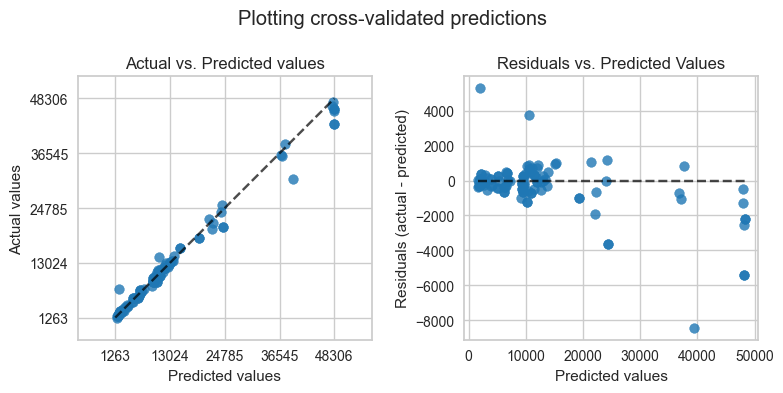

In [30]:
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    validation_data["charges"],
    y_pred=predictions["prediction_label"],
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    validation_data["charges"],
    y_pred=predictions["prediction_label"],
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, explained_variance_score

print('MSE: ', mean_squared_error(validation_data["charges"].values, predictions["prediction_label"].values))
print('MAE', mean_absolute_error(validation_data["charges"].values, predictions["prediction_label"].values))
print('MedianAE', median_absolute_error(validation_data["charges"].values, predictions["prediction_label"].values))
print('Explained Variance: ', explained_variance_score(validation_data["charges"].values, predictions["prediction_label"].values))
print('R2: ', r2_score(validation_data["charges"].values, predictions["prediction_label"].values))


MSE:  2786052.662303903
MAE 798.6912938578487
MedianAE 373.0425923849839
Explained Variance:  0.9819021565983148
R2:  0.981778065650633
